In [8]:
# Importazione delle librerie necessarie
import os
import numpy as np
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display
from pydub import AudioSegment
from tqdm import tqdm  # Importa la libreria tqdm per la progress bar

In [9]:

# Definizione delle directory di input e output
input_dir = 'dataset_1/Target/Cargo'
output_dir = 'NuovoDataset'

# Creare la directory di output se non esiste
os.makedirs(output_dir, exist_ok=True)

# Definizione della lunghezza desiderata in secondi e in campioni
desired_length_sec = 4  # Durata desiderata in secondi
sampling_rate = 192000  # Frequenza di campionamento (modifica se necessario)
desired_length_samples = int(desired_length_sec * sampling_rate)
# Lista per memorizzare i percorsi dei file audio
audio_files = []

In [10]:

# Scorrere ricorsivamente le cartelle nel dataset
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith('.wav') or file.endswith('.mp3'):
            audio_files.append(os.path.join(root, file))

# Visualizzare il numero di file audio trovati
print(f"Numero di file audio trovati: {len(audio_files)}")


Numero di file audio trovati: 111


In [38]:

def normalize_audio(input_file, output_directory):
    # Carica il file audio
    audio_data, sample_rate = librosa.load(input_file, sr=None)
    
    # Trova il valore massimo assoluto nel segnale audio
    max_val = np.max(np.abs(audio_data))
    
    # Normalizza il segnale tra 0 e 1
    normalized_audio = (audio_data / max_val + 1) / 2
    
    # Ottieni il nome del file originale
    original_filename = os.path.basename(input_file)
    
    # Crea il percorso completo per il nuovo file nella directory di output
    output_file = os.path.join(output_directory, original_filename)
    
    # Scrivi il file audio normalizzato
    sf.write(output_file, normalized_audio, sample_rate)
    
    print("normalizzazione eseguita")
    
# Esempio di utilizzo
# input_file = 'dataset_1/Target/Acoustic Harassment Devices/AHD_Airmar.wav'

output_dir = "NuovoDataset/Cargo"
for file in audio_files:
    normalize_audio(file, output_dir)
    

normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita
normalizzazione eseguita


In [39]:

audio_cargo = []

# Scorrere ricorsivamente le cartelle nel dataset
for root, dirs, files in os.walk("NuovoDataset/Cargo"):
    for file in files:
        if file.endswith('.wav') or file.endswith('.mp3'):
            audio_cargo.append(os.path.join(root, file))

# Visualizzare il numero di file audio trovati
print(f"Numero di file audio trovati: {len(audio_cargo)}")
print(audio_cargo)

Numero di file audio trovati: 111
['NuovoDataset/Cargo\\20171104-1_1.wav', 'NuovoDataset/Cargo\\20171104a-2_2.wav', 'NuovoDataset/Cargo\\20171105a-3_3.wav', 'NuovoDataset/Cargo\\20171106-4_4.wav', 'NuovoDataset/Cargo\\20171107-5_5.wav', 'NuovoDataset/Cargo\\20171107b-6_6.wav', 'NuovoDataset/Cargo\\20171110-7_7.wav', 'NuovoDataset/Cargo\\20171111-8_8.wav', 'NuovoDataset/Cargo\\20171111e-9_9.wav', 'NuovoDataset/Cargo\\20171111f-10_10.wav', 'NuovoDataset/Cargo\\20171111g-11_11.wav', 'NuovoDataset/Cargo\\20171112-12_12.wav', 'NuovoDataset/Cargo\\20171113-13_13.wav', 'NuovoDataset/Cargo\\20171114a-14_14.wav', 'NuovoDataset/Cargo\\20171114b-15_15.wav', 'NuovoDataset/Cargo\\20171114c-16_16.wav', 'NuovoDataset/Cargo\\20171114d-17_17.wav', 'NuovoDataset/Cargo\\20171115a-18_18.wav', 'NuovoDataset/Cargo\\20171115b-19_19.wav', 'NuovoDataset/Cargo\\20171115d-20_20.wav', 'NuovoDataset/Cargo\\20171116-22_002044.wav', 'NuovoDataset/Cargo\\20171117a-24_045829.wav', 'NuovoDataset/Cargo\\20171117b-25_055

In [40]:


def split_audio(input_file, output_directory, segment_duration=4):
    # Carica il file audio
    audio_data, sample_rate = librosa.load(input_file, sr=None)
    
    # Calcola il numero di campioni per ogni segmento
    segment_samples = int(segment_duration * sample_rate)
    
    # Ottieni il nome del file originale senza estensione
    original_filename = os.path.splitext(os.path.basename(input_file))[0]
    
    # Crea la directory di output se non esiste
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    # Inizializza il contatore per i segmenti
    segment_counter = 0
    
    # Itera attraverso l'audio e salva i segmenti
    for start in range(0, len(audio_data), segment_samples):
        end = start + segment_samples
        segment_data = audio_data[start:end]
        
        # Costruisci il nome del file per il segmento
        segment_filename = f"{original_filename}_segment_{segment_counter}.wav"
        output_file = os.path.join(output_directory, segment_filename)
        
        # Scrivi il file audio del segmento
        sf.write(output_file, segment_data, sample_rate)
        
        # Incrementa il contatore dei segmenti
        segment_counter += 1

# Esempio di utilizzo
# input_file = 'dataset_1/Target/Acoustic Harassment Devices/AHD_Airmar.wav'
output_directory = 'NuovoDataset'
for file in audio_cargo:
    split_audio(file, output_directory)
    
print("suddivisione completata")

suddivisione completata


In [41]:
audio_norm = []

# Scorrere ricorsivamente le cartelle nel dataset
for root, dirs, files in os.walk("NuovoDataset"):
    for file in files:
        if file.endswith('.wav') or file.endswith('.mp3'):
            audio_norm.append(os.path.join(root, file))

# Visualizzare il numero di file audio trovati
print(f"Numero di file audio trovati: {len(audio_norm)}")
print(audio_norm)

Numero di file audio trovati: 9671
['NuovoDataset\\20171104-1_1_segment_0.wav', 'NuovoDataset\\20171104-1_1_segment_1.wav', 'NuovoDataset\\20171104-1_1_segment_10.wav', 'NuovoDataset\\20171104-1_1_segment_100.wav', 'NuovoDataset\\20171104-1_1_segment_101.wav', 'NuovoDataset\\20171104-1_1_segment_102.wav', 'NuovoDataset\\20171104-1_1_segment_103.wav', 'NuovoDataset\\20171104-1_1_segment_104.wav', 'NuovoDataset\\20171104-1_1_segment_105.wav', 'NuovoDataset\\20171104-1_1_segment_106.wav', 'NuovoDataset\\20171104-1_1_segment_107.wav', 'NuovoDataset\\20171104-1_1_segment_108.wav', 'NuovoDataset\\20171104-1_1_segment_109.wav', 'NuovoDataset\\20171104-1_1_segment_11.wav', 'NuovoDataset\\20171104-1_1_segment_110.wav', 'NuovoDataset\\20171104-1_1_segment_111.wav', 'NuovoDataset\\20171104-1_1_segment_112.wav', 'NuovoDataset\\20171104-1_1_segment_113.wav', 'NuovoDataset\\20171104-1_1_segment_114.wav', 'NuovoDataset\\20171104-1_1_segment_12.wav', 'NuovoDataset\\20171104-1_1_segment_13.wav', 'Nuovo

In [42]:
import os
import numpy as np
import soundfile as sf
import librosa
import matplotlib.pyplot as plt
import psutil
import gc
from pydub import AudioSegment

memory_threshold = 0.8  # Soglia di memoria (80%)

def generate_spectrogram(file, output_folder):
    # Controlla l'estensione del file
    if file.endswith('.mp3'):
        audio = AudioSegment.from_mp3(file).set_frame_rate(sampling_rate).set_channels(1)
        y = np.array(audio.get_array_of_samples(), dtype=np.float32)
        sr = audio.frame_rate
    else:  # file.endswith('.wav')
        y, sr = sf.read(file, always_2d=False)
        if len(y.shape) > 1:  # Se stereo, converte in mono
            y = librosa.to_mono(y.T)
        y = librosa.resample(y, orig_sr=sr, target_sr=sampling_rate)
        sr = sampling_rate
    
    # Calcola lo spettrogramma STFT
    D = np.abs(librosa.stft(y))  # Magnitude of the STFT
    D_db = librosa.amplitude_to_db(D, ref=np.max)
    
    # Crea la cartella di output se non esiste
    os.makedirs(output_folder, exist_ok=True)
    
    # Creare la struttura delle directory di output mantenendo la stessa gerarchia
    relative_path = os.path.relpath(file, input_dir)
    segment_output_dir = os.path.splitext(os.path.join(output_folder, relative_path))[0]
    os.makedirs(segment_output_dir, exist_ok=True)
    base_name = os.path.splitext(os.path.basename(file))[0]
    spectrogram_output_file = os.path.join(output_folder, f'{base_name}_spectrogram.png')
        
    # Salva lo spettrogramma come immagine
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram (STFT)')
    plt.tight_layout()
    plt.savefig(spectrogram_output_file, bbox_inches='tight', pad_inches=0.1)
    plt.close()

KeyboardInterrupt: 

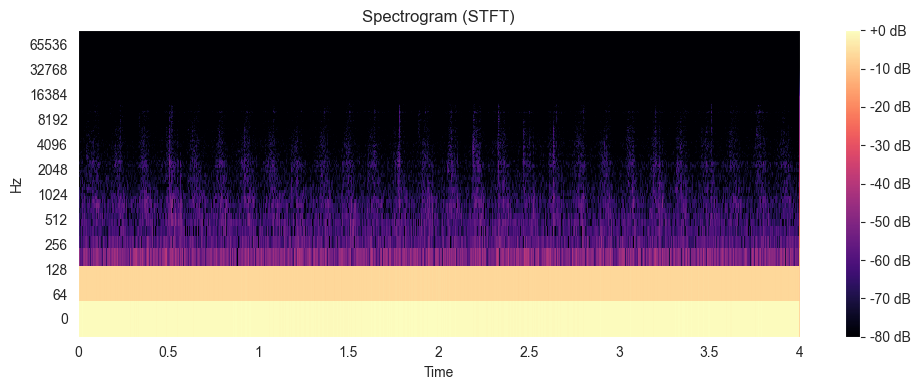

In [43]:

def check_memory_and_cleanup():
    memory_usage = psutil.virtual_memory().percent
    if memory_usage > memory_threshold * 100:
        gc.collect()

output_folder = 'NuovoDataset/Cargo'
for file in audio_norm: 
    generate_spectrogram(file, output_folder)
    check_memory_and_cleanup()